# Claude Code for creating slide Deck

In [14]:
import pygame
import math
import sys
import numpy as np
from PIL import Image
import imageio
from IPython.display import Video, display
import os
import time

def check_dependencies():
    try:
        import imageio.plugins.ffmpeg
    except ImportError:
        raise ImportError(
            "FFMPEG is required for video export. "
            "Please run: pip install imageio[ffmpeg]"
        )

class NavyAnimation:
    def __init__(self, width=800, height=400, record=False):
        if record:
            check_dependencies()
            
        # Initialize Pygame
        pygame.init()
        
        # Constants
        self.WIDTH = width
        self.HEIGHT = height
        self.WHITE = (255, 255, 255)
        self.BLACK = (0, 0, 0)
        self.NAVY_BLUE = (0, 0, 128)
        self.GRAY = (128, 128, 128)
        
        # Recording settings
        self.record = record
        self.frames = []
        
        # Set up display
        if 'google.colab' in str(get_ipython()):
            os.environ["SDL_VIDEODRIVER"] = "dummy"
        
        self.screen = pygame.display.set_mode((self.WIDTH, self.HEIGHT))
        self.clock = pygame.time.Clock()
        
        # Initialize fonts
        self.font = pygame.font.SysFont('Arial', 16)
        self.small_font = pygame.font.SysFont('Arial', 14)
        
    def draw_waves(self, offset):
        for x in range(0, self.WIDTH, 50):
            points = []
            for i in range(0, 50, 5):
                y = math.sin((x + i + offset) * 0.05) * 10 + 300
                points.append((x + i, y))
            if len(points) > 1:
                pygame.draw.lines(self.screen, self.BLACK, False, points, 2)

    def draw_tug_boat(self, x):
        points = [(x, 280), (x+30, 280), (x+50, 260),
                 (x+70, 260), (x+90, 280), (x+110, 280),
                 (x+110, 300), (x, 300)]
        pygame.draw.polygon(self.screen, self.BLACK, points, 2)
        pygame.draw.rect(self.screen, self.BLACK, (x+40, 250, 20, 10), 2)

    def draw_destroyer(self, x):
        points = [(x, 250), (x+300, 250), (x+350, 270),
                 (x+400, 270), (x+400, 300), (x, 300)]
        pygame.draw.polygon(self.screen, self.BLACK, points, 2)

    def draw_mechanics_assistant(self, x, y, time):
        pygame.draw.rect(self.screen, self.BLACK, (x, y, 120, 160), 2)
        text1 = self.small_font.render("Mechanics", True, self.BLACK)
        text2 = self.small_font.render("Assistant", True, self.BLACK)
        self.screen.blit(text1, (x+10, y+10))
        self.screen.blit(text2, (x+10, y+30))
        
        for i in range(3):
            color = self.BLACK if (time // 20) % 3 != i else self.NAVY_BLUE
            pygame.draw.line(self.screen, color, (x+10, y+70+i*20),
                           (x+110, y+70+i*20), 2)

    def draw_knowledge_graph(self, x, y):
        nodes = [(x+20, y+20), (x+60, y+20), (x+40, y+50)]
        for node in nodes:
            pygame.draw.circle(self.screen, self.BLACK, node, 10, 2)
        
        pygame.draw.line(self.screen, self.BLACK, nodes[0], nodes[1], 2)
        pygame.draw.line(self.screen, self.BLACK, nodes[0], nodes[2], 2)
        pygame.draw.line(self.screen, self.BLACK, nodes[1], nodes[2], 2)

    def draw_mechanic(self, x, y):
        pygame.draw.circle(self.screen, self.BLACK, (x, y), 15, 2)
        pygame.draw.line(self.screen, self.BLACK, (x, y+15), (x, y+45), 2)
        pygame.draw.line(self.screen, self.BLACK, (x-20, y+30), (x+20, y+30), 2)
        pygame.draw.line(self.screen, self.BLACK, (x, y+45), (x-15, y+75), 2)
        pygame.draw.line(self.screen, self.BLACK, (x, y+45), (x+15, y+75), 2)

    def capture_frame(self):
        try:
            pygame_surface = self.screen.copy()
            string_image = pygame.image.tostring(pygame_surface, 'RGB')
            temp_surf = Image.frombytes('RGB', (self.WIDTH, self.HEIGHT), string_image)
            return np.array(temp_surf)
        except Exception as e:
            print(f"Error capturing frame: {str(e)}")
            return None

    def save_video(self, output_path='navy_animation.mp4'):
        try:
            print("Saving video...")
            imageio.mimsave(output_path, self.frames, fps=60)
            print(f"Video saved to {output_path}")
            return output_path
        except Exception as e:
            print(f"Error saving video: {str(e)}")
            return None

    def run(self, duration_seconds=10):
        try:
            start_time = time.time()
            frame_count = 0
            
            while time.time() - start_time < duration_seconds:
                self.screen.fill(self.WHITE)
                
                frame_count += 1
                wave_offset = frame_count % 100
                tug_x = ((frame_count % 300) - 150) + 100
                
                self.draw_waves(wave_offset)
                self.draw_tug_boat(tug_x)
                self.draw_destroyer(tug_x + 150)
                self.draw_mechanics_assistant(650, 50, frame_count)
                self.draw_knowledge_graph(650, 250)
                self.draw_mechanic(400, 100)
                
                title = self.font.render("$1.8B Maintenance Backlog", True, self.BLACK)
                self.screen.blit(title, (50, 50))
                
                if self.record:
                    frame = self.capture_frame()
                    if frame is not None:
                        self.frames.append(frame)
                    
                pygame.display.flip()
                self.clock.tick(60)

            pygame.quit()
            
            if self.record:
                return self.save_video()
            
        except Exception as e:
            print(f"Error during animation: {str(e)}")
            pygame.quit()
            return None
        
def create_and_display_animation(duration=10, record=True):
    """
    Creates and displays the animation, optionally recording it.
    Returns the video if recorded.
    """
    try:
        animation = NavyAnimation(record=record)
        output_path = animation.run(duration_seconds=duration)
        
        if record and output_path:
            return Video(output_path)
        return None
    except Exception as e:
        print(f"Error creating animation: {str(e)}")
        return None

# Usage example:
"""
# First install required dependency:
!pip install imageio[ffmpeg]

# Then run the animation:
video = create_and_display_animation(duration=10, record=True)
if video is not None:
    display(video)
"""

'\n# First install required dependency:\n!pip install imageio[ffmpeg]\n\n# Then run the animation:\nvideo = create_and_display_animation(duration=10, record=True)\nif video is not None:\n    display(video)\n'

In [ ]:
# 1. First install dependencies
# !pip install imageio[ffmpeg]

# 2. Then run the animation code (paste the complete code above)

# 3. Finally, create and display the animation
video = create_and_display_animation(duration=10, record=True)
if video is not None:
    display(video)


## Slide deck 

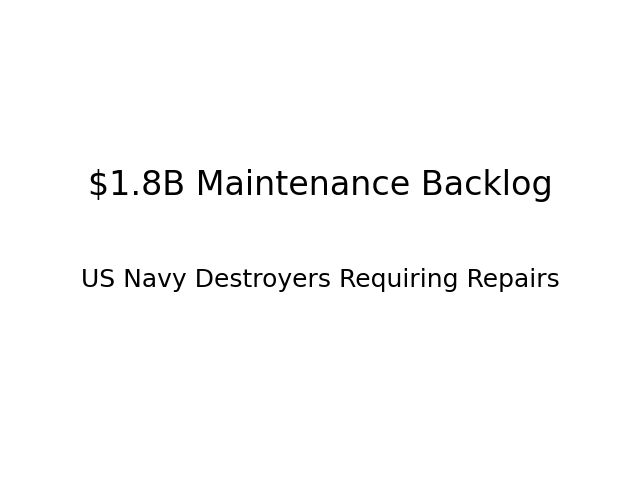

FileNotFoundError: [Errno 2] No such file or directory: 'tug_boat_destroyer.png'

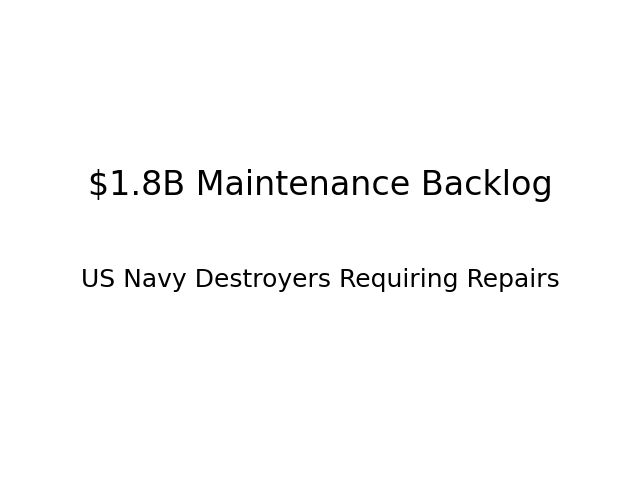

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

# Slide 1: Navy Maintenance Backlog
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
ax.text(0.5, 0.6, "$1.8B Maintenance Backlog", fontsize=24, ha='center')
ax.text(0.5, 0.4, "US Navy Destroyers Requiring Repairs", fontsize=18, ha='center')
display(fig)

# Slide 2: Tug Boat Pulling Destroyer
img = mpimg.imread('tug_boat_destroyer.png')
display(Image(img, width=800))

# Slide 3: Shortage of Senior Mechanics
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
ax.text(0.5, 0.6, "Shortage of Senior Mechanics", fontsize=24, ha='center')
ax.text(0.5, 0.4, "Impacting Navy's Ability to Maintain Fleet", fontsize=18, ha='center')
display(fig)

# Slide 4: Building the Mechanics Assistant
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
ax.text(0.5, 0.7, "Building the Mechanics Assistant", fontsize=24, ha='center')
ax.text(0.5, 0.5, "Utilizing Large Language Models (LLMs)", fontsize=18, ha='center')
ax.text(0.5, 0.3, "to Assist Junior Mechanics", fontsize=18, ha='center')
display(fig)

# Slide 5: Mechanics Assistant Workflow
img = mpimg.imread('mechanics_assistant_workflow.png')
display(Image(img, width=800))

# Slide 6: Detailed Repair Instructions
img = mpimg.imread('repair_instructions.png')
display(Image(img, width=800))

# Slide 7: Updating Knowledge Base
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
ax.text(0.5, 0.6, "Updating Knowledge Base", fontsize=24, ha='center')
ax.text(0.5, 0.4, "Improving Future Maintenance", fontsize=18, ha='center')
display(fig)

# Slide 8: Keeping the Fleet Seaworthy
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
ax.text(0.5, 0.6, "Keeping the Fleet Seaworthy", fontsize=24, ha='center')
ax.text(0.5, 0.4, "Enhancing National Defense", fontsize=18, ha='center')
display(fig)